In [ ]:
pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.7 MB/s eta 0:00:00


#Không chạy all cell này

In [ ]:
def changing(refs,objects):
  matched = [0]*len(refs)
  add_in = ""
  elemenate = ""
  if refs == ['Do not have drug']
  for i in range(len(objects)):
    flag = 0
    for j in range(len(refs)):
      if objects[i] == refs[j]:
        matched[j] = 1
        flag = 1
    if flag == 0:
      add_in += objects[i] + ", "
  for k in range(len(matched)):
    if matched[k] == 0:
      elemenate += refs[k] + ", "
  return add_in,elemenate #text



In [ ]:
#Full EHR
import json
# load file json - 1000 patients
file = open('/content/drive/MyDrive/NLP/2024-05-VĨNHTHÀNH (1).json')
data = json.load(file)
patient_data = data
k = patient_data.get('encounter',[])


In [ ]:
#Full EHR
import json
# load file json - 1000 patients
file = open('/content/drive/MyDrive/NLP/2024-05-VĨNHTHÀNH (1).json')
data = json.load(file)
med_info = []
enc_timeline = []
patient_data = data
context = ""

vital_sign = []
date_enc = []
Drug = []
Diagnosis = []
Note = []
labtests = []
clinical_exam = []
diags = []
Generic_drugs = {}

count = 0
k = patient_data.get('encounter',[])
k = k[-1::-1]
for pa_enc in k:
  vital = ""
  Drug_s = []
  Diagnosis_s = []
  if pa_enc is not None and int(pa_enc['performedDate'][-4:]) >= 2010: #Đặt điều kiện do biết trước
    context += "***" + "\n"
    context += "Bệnh nhân nam, 68 tuổi, nhóm máu B_RH+" + "\n"
    context += "Khám ngày " + pa_enc['performedDate'] + "\n"
    try:
      vital += "pulse: " + str(pa_enc['vitalSigns']['pulse']) + "\n"
      vital += "bloodPressureLow: " + str(pa_enc['vitalSigns']['bloodPressureLow']) + "\n"
      vital += "bloodPressureHigh: " + str(pa_enc['vitalSigns']['bloodPressureHigh']) + "\n"
      vital += "respirationRate: " + str(pa_enc['vitalSigns']['respirationRate']) + "\n"
    except:
      pass
    vital_sign.append(vital)
    date_enc.append(pa_enc['performedDate'])
  else:
    continue
  try:
    name = [i for i in pa_enc['clinicalExamination'].keys()][0]
    context += "Khám: " + [i for i in pa_enc['clinicalExamination'].keys()][0] + "\n"
    try:
      clinical_exam.append(pa_enc['clinicalExamination'][name]["vi"])
      context += "clinical: "+ pa_enc['clinicalExamination'][name]["vi"] +"\n"
    except:
      clinical_exam.append("")
      context += "clinical: \n"
  except:
    clinical_exam.append("")
  for pa_diag in pa_enc.get('diagnosis',{}).get('conclusion',[]):
    diags.append(pa_diag['code']['text']['vi'] + " " + pa_diag['status']['text']['vi'])
    #Diagnosis_s.append(pa_diag['code']['text']['vi'])
  try:
    context += pa_enc['diagnosis']['note']['vi'] + "\n"
    Note.append(pa_enc['diagnosis']['note']['vi'])
  except:
    Note.append("")
  for pa_med in pa_enc.get('medication',[]):
    context += "Thuốc: " +pa_med['code']['text']['vi'] + "\n"
    Drug_s.append(pa_med['code']['text']['vi'])
    try:
      Generic_drugs[pa_med['code']['text']['vi']][count] = 1
    except:
      l = [0]*25
      l[count] = 1
      Generic_drugs[pa_med['code']['text']['vi']] = l
  labtest = ""
  for pa_lab in pa_enc.get('labResult',[]):
    for pa_test in pa_lab.get('tests',[]):
      context += "Lab test:" + pa_test['testCode']['text']['vi'] + ": "
      labtest += "Lab test:" + pa_test['testCode']['text']['vi'] + ": "
      try:
        pa_test['valueQuantity']['value']
        try:
          context += str(pa_test['valueQuantity']['value']) +" "+ str(pa_test['range']) + "\n"
          labtest += str(pa_test['valueQuantity']['value']) +" "+ str(pa_test['range']) + "\n"
        except:
          context += str(pa_test['valueQuantity']['value'])  + "\n"
          labtest += str(pa_test['valueQuantity']['value'])  + "\n"
      except:
        try:
          context += pa_test['valueString'] + "\n"
          labtest += pa_test['valueString'] + "\n"
        except:
          pass

  labtests.append(labtest)
  if count == 0:
    Drug_0 = Drug_s
    Diagnosis_0 = Diagnosis_s
    Drug.append(Drug_s)
    Diagnosis.append(Diagnosis_s)
  else:
    add_drug,dele_drug = changing(Drug_0,Drug_s)
    if add_drug == "" and dele_drug == "":
      Drug.append([""])
    else:
      Drug.append(["Thêm: "+ add_drug + "\n" + "Bỏ: "+ dele_drug])
    add_diag,dele_diag = changing(Diagnosis_0,Diagnosis_s)
    if add_diag == "" and dele_diag == "":
      Diagnosis.append([""])
    else:
      Diagnosis.append(["Thêm: "+ add_diag + "\n" + "Bỏ: "+ dele_diag])
    Drug_0 = Drug_s
    Diagnosis_0 = Diagnosis_s
  count += 1
  enc_timeline.append(context)
  context = ""
med_info.append(enc_timeline[-1::-1])
enc_timeline = []

In [ ]:
#Check for changing diagnose and drugs over time
event = [0]*len(date_enc)
for i in range(len(Drug)):
  text = ".".join(Drug[i])
  if event[i] == 0:
    event[i] = "***\n"
    event[i] += "Khám ngày: " + date_enc[i] + "\n"
    event[i] += "Khám lâm sàng: " + clinical_exam[i] + "\n"
    event[i] += "Chẩn đoán: " + "\n"+ ",".join(Diagnosis[i]) + "\n"
    event[i] += "Thuốc: " + text + "\n"
    event[i] += "Note: " + Note[i] + "\n"
    event[i] += "Vital sign: " + "\n" + vital_sign[i]
    event[i] += "Xét nghiệm cận lâm sàn:" + "\n" + labtests[i]
  else:
    event[i] += "Thuốc: " + text + "\n"
    event[i] += "Khám lâm sàng: " + clinical_exam[i] + "\n"
    event[i] += "Chẩn đoán: " + ",".join(Diagnosis[i]) + "\n"
    event[i] += "Note: " + Note[i] + "\n"
    event[i] += "Vital sign: " + "\n" + vital_sign
    event[i] += "Xét nghiệm cận lâm sàn:" + "\n" + labtests[i]

In [ ]:
import json
#Get all diagnosis
# load file json - 1000 patients
file = open('/content/drive/MyDrive/NLP/data_ehr/2024-05-MAIHỮUPHƯỚC.json')
data = json.load(file)
all_diag = []
patient_data = data
k = patient_data.get('encounter',[])
k = k[-1::-1]
for pa_enc in k:
  try:
    for pa_diag in pa_enc.get('diagnosis',{}).get('conclusion',[]):
      if pa_diag['code']['text']['vi'] not in all_diag:
        all_diag.append(pa_diag['code']['text']['vi'])
  except:
    pass

In [ ]:
all_diag_text = ""
for i in all_diag:
  all_diag_text += i + "\n"

In [ ]:
import json
#Get all context enc
file = open('/content/drive/MyDrive/NLP/data_ehr/2024-05-MAIHỮUPHƯỚC.json')
data = json.load(file)
patient_data = data

vital_sign = []
date_enc = []
Drug = []
Diagnosis = []
Note = []
labtests = []
clinical_exam = []
groups = []

for pa_enc in k:
  vital = ""
  if pa_enc is not None:
    try:
      vital += "pulse: " + str(pa_enc['vitalSigns']['pulse']) + "\n"
      vital += "bloodPressureLow: " + str(pa_enc['vitalSigns']['bloodPressureLow']) + "\n"
      vital += "bloodPressureHigh: " + str(pa_enc['vitalSigns']['bloodPressureHigh']) + "\n"
      vital += "respirationRate: " + str(pa_enc['vitalSigns']['respirationRate']) + "\n"
    except:
      pass
    vital_sign.append(vital)
    date_enc.append(pa_enc['performedDate'])
  else:
    continue
  try:
    name = [i for i in pa_enc['clinicalExamination'].keys()][0]
    try:
      clinical_exam.append(pa_enc['clinicalExamination'][name]["vi"])
    except:
      clinical_exam.append("")
  except:
    clinical_exam.append("")
  set_group = []
  diag_enc = {}
  for pa_diag in pa_enc.get('diagnosis',{}).get('conclusion',[]):
    diag_name = pa_diag['code']['text']['vi']
    #diag_enc.append(diag_name + " " + pa_diag['status']['text']['vi'] + "\n")
    for group in context_event[0].format.keys():
      if diag_name in context_event[0].format[group]:
        set_group.append(group)
        try:
          if diag_name not in diag_enc[group]:
            diag_enc[group].append(diag_name)
        except:
          diag_enc[group] = [diag_name]
        break

  set_group = list(set(set_group))
  groups.append(set_group)
  Diagnosis.append(diag_enc)
  try:
    Note.append(pa_enc['diagnosis']['note']['vi'])
  except:
    Note.append("")
  drug_enc = []
  for pa_med in pa_enc.get('medication',[]):
    drug_enc.append(pa_med['code']['text']['vi'])
  drug_enc = list(set(drug_enc))
  Drug.append(drug_enc)
  labtest = ""
  for pa_lab in pa_enc.get('labResult',[]):
    for pa_test in pa_lab.get('tests',[]):
      labtest += "Lab test:" + pa_test['testCode']['text']['vi'] + ": "
      try:
        pa_test['valueQuantity']['value']
        try:
          #context += str(pa_test['valueQuantity']['value']) +" "+ str(pa_test['range']) + "\n"
          labtest += str(pa_test['valueQuantity']['value']) +" "+ str(pa_test['range']) + "\n"
        except:
          #context += str(pa_test['valueQuantity']['value'])  + "\n"
          labtest += str(pa_test['valueQuantity']['value'])  + "\n"
      except:
        try:
          #context += pa_test['valueString'] + "\n"
          labtest += pa_test['valueString'] + "\n"
        except:
          pass
  labtests.append(labtest)


In [ ]:
if len(vital_sign)==len(date_enc)==len(Drug)==len(Diagnosis)==len(labtests)==len(clinical_exam)==len(Note):
  print("True")
else:
  print(len(vital_sign))
  print(len(date_enc))
  print(len(Drug))
  print(len(Diagnosis))
  print(len(labtests))
  print(len(clinical_exam))

True


In [ ]:
#filter enc by group
group_dict_seq = {}
for group in context_event[0].format.keys():
  group_dict_seq[group] = []
  for j in range(len(groups)):
    if group in groups[j]:
      group_dict_seq[group].append(j)

In [ ]:
#make content for each group diagnosis
context_enc = {}
for key in group_dict_seq.keys():
  context_enc[key] = []
  count = 0
  for j in group_dict_seq[key]:
    context = "***\n"
    if group_drug[key][count].format == None:
      group_drug[key][count].format = ["Do not have drug"]
    if count == 0:
      context += "Khám ngày: " + date_enc[j] + "\n"
      context += "Khám lâm sàng: " + clinical_exam[j] + "\n"
      context += "Chẩn đoán: " + "\n"+ ", ".join(Diagnosis[j][key]) + "\n"
      context += "Thuốc: " + ", ".join(group_drug[key][count].format) + "\n"
      context += "Note: " + Note[j] + "\n"
      context += "Vital sign: " + "\n" + vital_sign[j]
      context += "Xét nghiệm cận lâm sàn:" + "\n" + labtests[j]
      #diag_ref = Diagnosis[j][key]
      drug_ref = group_drug[key][count].format
    else:
      add_drug,dele_drug = changing(drug_ref,group_drug[key][count].format)
      if add_drug == "" and dele_drug == "":
        count += 1
        continue
      else:
        context += "Khám ngày: " + date_enc[j] + "\n"
        context += "Khám lâm sàng: " + clinical_exam[j] + "\n"
        context += "Chẩn đoán: " + ", ".join(Diagnosis[j][key]) + "\n"
        context += "Thuốc: \n" + ", ".join(group_drug[key][count].format) + "\n"
        context += "Thêm: " + add_drug + "\n" + "Bỏ: " + dele_drug + "\n"
        context += "Note: " + Note[j] + "\n"
        context += "Vital sign: " + "\n" + vital_sign[j]
        context += "Xét nghiệm cận lâm sàn:" + "\n" + labtests[j]
        diag_ref = Diagnosis[j]
        drug_ref = group_drug[key][count].format
    count += 1
    context_enc[key].append(context)

In [ ]:
group_dict_seq

{'Metabolic Disorders': [0,
  1,
  2,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  17,
  18],
 'Liver Function Abnormalities': [0, 17, 18],
 'Cardiovascular Diseases': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  17,
  18],
 'Gastrointestinal Disorders': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [ ]:
group_drug['Liver Function Abnormalities']

[extract_drug(format=['Do not have drug']),
 extract_drug(format=['Do not have drug']),
 extract_drug(format=['Silygamma'])]

# Lama3-70b

In [ ]:
pip install groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install langchain-groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 14.0 MB/s eta 0:00:00


In [ ]:
api_key = "API key"
import os

from groq import Groq
from langchain_groq import ChatGroq
llama3 = ChatGroq(temperature=0, model_name="llama3-70b-8192",groq_api_key=api_key)


# GPT4

**Get Group from enc**

In [ ]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser
from typing import Optional

In [ ]:
import os
from langchain_community.callbacks import get_openai_callback
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
os.environ['OPENAI_API_KEY'] = "API key"
from langchain_openai import ChatOpenAI
chat_4 = ChatOpenAI(model = "gpt-4o-2024-05-13",temperature = 0)
chat_3 = ChatOpenAI(model = "gpt-3.5-turbo",temperature = 0)

ModuleNotFoundError: No module named 'langchain_community'

In [ ]:
class group_diag(BaseModel):
  format: Optional[dict] =  Field(None,description="key is the name of the group and value is the name of diagnosis in corresponding group")

parser = PydanticOutputParser(pydantic_object=group_diag)

In [ ]:
#prompt for classify diags
prompt = PromptTemplate(
    template = """here are the diagnosis that i have had. As a doctor, could you classify them into groups for me easy to watching the process diseases.
  {text}
  Output format:
  {format_instructions}
     """,
    input_variables=["text"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain_group = LLMChain(prompt = prompt,
                 llm = chat_4)

NameError: name 'PromptTemplate' is not defined

In [ ]:
cost = 0
context_event = []
with get_openai_callback() as cb:
  output = chain_group.predict(text = all_diag_text)
  context_event.append(parser.invoke(output))
  print(output)
  print()
  print(f"Total Tokens: {cb.total_tokens}")
  print(f"Prompt Tokens: {cb.prompt_tokens}")
  print(f"Completion Tokens: {cb.completion_tokens}")
  print(f"Total Cost (USD): ${cb.total_cost}")
  cost += cb.total_cost

```json
{
  "format": {
    "Metabolic Disorders": [
      "E78 - Rối loạn chuyển hoá lipoprotein và tình trạng tăng lipid máu khác",
      "E11 - Bệnh đái tháo đường không phụ thuộc insuline"
    ],
    "Liver Function Abnormalities": [
      "R94.5 - Kết quả bất thường về thăm dò chức năng gan"
    ],
    "Cardiovascular Diseases": [
      "I10 - Bệnh tăng huyết áp vô căn (nguyên phát)",
      "I25.5 - Bệnh cơ tim do thiếu máu cục bộ",
      "I83 - Dãn tĩnh mạch chi dưới"
    ],
    "Gastrointestinal Disorders": [
      "K29 - Viêm dạ dày và tá tràng",
      "K58 - Hội chứng ruột kích thích"
    ]
  }
}
```

Total Tokens: 541
Prompt Tokens: 337
Completion Tokens: 204
Total Cost (USD): $0.004745


**Summary by AI**

In [ ]:
#prompt for extract info each encounter
class extract_drug(BaseModel):
  format: Optional[list] =  Field(None,description="List of extracted drugs using in each encounter")

parser_drug = PydanticOutputParser(pydantic_object=extract_drug)

In [ ]:
#prompt for each enc
prompt = PromptTemplate(
    template = """here is the drugs in an encounter. As a doctor, could you extract the drugs, which treating diseases {diags}.

  The drugs:
  {text}

  Output responses only name of the extracted drugs (Base on name in the list of drug above)
  If you do not find the drugs, output is a list with string "Do not have drug"
  Output format:
  {format_instructions}
     """,
    input_variables=["text",'diags'],
    partial_variables={"format_instructions": parser_drug.get_format_instructions()},
)

chain_extract = LLMChain(prompt = prompt,
                 llm = chat_3)

In [ ]:
group_drug = {}
for name_group in context_event[0].format.keys():
  for i in group_dict_seq[name_group]:
    with get_openai_callback() as cb:
      output = chain_extract.predict(text = ", ".join(Drug[i]),diags = ", ".join(context_event[0].format[name_group]))
      print(parser_drug.invoke(output))
      try:
        group_drug[name_group].append(parser_drug.invoke(output))
      except:
        group_drug[name_group] = [(parser_drug.invoke(output))]
      print()
      print(f"Total Tokens: {cb.total_tokens}")
      print(f"Prompt Tokens: {cb.prompt_tokens}")
      print(f"Completion Tokens: {cb.completion_tokens}")
      print(f"Total Cost (USD): ${cb.total_cost}")
      cost += cb.total_cost

format=['Simvastatin', 'Metformin']

Total Tokens: 305
Prompt Tokens: 288
Completion Tokens: 17
Total Cost (USD): $0.000466
format=['Metformin hydrochloride', 'Simvastatin', 'Ezetimib', 'Telmisartan', 'Hydrochlorothiazid']

Total Tokens: 407
Prompt Tokens: 366
Completion Tokens: 41
Total Cost (USD): $0.000631
format=['Glucophage ® XR 500 mg', 'Biovacor']

Total Tokens: 361
Prompt Tokens: 339
Completion Tokens: 22
Total Cost (USD): $0.0005525
format=['Atorvastatin', 'Metformin']

Total Tokens: 468
Prompt Tokens: 450
Completion Tokens: 18
Total Cost (USD): $0.000711
format=['Glucophage 500mg', 'Simvastar tablet 20mg']

Total Tokens: 478
Prompt Tokens: 454
Completion Tokens: 24
Total Cost (USD): $0.000729
format=['Metformin', 'Simvastatin']

Total Tokens: 460
Prompt Tokens: 443
Completion Tokens: 17
Total Cost (USD): $0.0006985
format=['Agirovastin 10', 'Galvus']

Total Tokens: 467
Prompt Tokens: 447
Completion Tokens: 20
Total Cost (USD): $0.0007105
format=['Silygamma', 'SaVi Bezafibrate

In [ ]:
#prompt for abstract each encounter
prompt_abstract_enc = PromptTemplate(
    template = """You are an assistant doctor, special in {key_group}. Base on the patient's information, please help me answer these questions of each encounter.
  1. Date of encounter
  2. The laboratory tests support for {diags} (if has).
  3. Extract the drug's information (add in, remove). Then answer these question:
  Why does it change? . Give the evidence (base on the patient's information). Do not add external information
  4. Surgery or interference information (if has)

Here is the patient's information:
{patient_inf}
     """,
    input_variables=["key_group","diags","patient_inf"]
)
chain_abstract = LLMChain(prompt = prompt_abstract_enc,
                 llm = llama3)

In [ ]:
summary_group = {}
for name_group in context_event[0].format.keys():
  summary = ""
  for i in context_enc[name_group]:
    with get_openai_callback() as cb:
      output = chain_abstract.predict(key_group = name_group,diags = ", ".join(context_event[0].format[name_group]),patient_inf = i)
      summary += output
      print(output)
      print()
      print(f"Total Tokens: {cb.total_tokens}")
      print(f"Prompt Tokens: {cb.prompt_tokens}")
      print(f"Completion Tokens: {cb.completion_tokens}")
      print(f"Total Cost (USD): ${cb.total_cost}")
      cost += cb.total_cost
  summary_group[name_group] = summary

I'd be happy to help you answer the questions based on the patient's information.

**1. Date of encounter**
The date of encounter is December 20, 2020.

**2. Laboratory tests supporting E78 - Rối loạn chuyển hoá lipoprotein và tình trạng tăng lipid máu khác, E11 - Bệnh đái tháo đường không phụ thuộc insuline (if has)**
The laboratory tests supporting E78 include:
- Cholesterol toàn phần: 6.87 (high)
- Triglycerid: 4.55 (high)
- LDL. C: 4.33 (high)
- HDL. C: 1.63 (low)

The laboratory test supporting E11 is:
- Glucose: 6.3 (high)
- Glucose (Urine): 151 (+)

**3. Extract the drug's information (add in, remove)**
There is no drug information available in the patient's record.

**4. Surgery or interference information (if has)**
There is no surgery or interference information available in the patient's record.

Total Tokens: 1686
Prompt Tokens: 1460
Completion Tokens: 226
Total Cost (USD): $0.0
I'd be happy to help!

**1. Date of encounter:** 15/02/2022

**2. Laboratory tests support:** 
-

In [ ]:
#prompt for summary all enc
prompt_sum = PromptTemplate(
    template = """The following is set of encounter overtime. Each encounter begins with date of encounter.
    The encounter is for treating {diags}
Information encounter over time:
{text}

Please healp me summarize all encounter. The summary inlcude the following information:
1. The group of diagnosis is {group_name}
2. The big changing of the patient.
  -Changing in drug or Diagnosis (if has)
  -Show the drug's change with 3 parts: regularly used drug, Stop drug (Drug only used one time in the past), replaced drug (drugs replace each other)
  -Give the reason for changing drug (if you think the reason is the big issue)
3. Note of doctor about the patient (if has)
4. Conclusion about state of patient
Ouput in Vietnamese. Do not show detail summary over date.
Now take a deep breath, then analyze and give me the summary
Helpful Answer:
     """,
    input_variables=["text",'diags','group_name']
)
chain_sum = LLMChain(prompt = prompt_sum,
                 llm = chat_4)

In [ ]:
for name_group in summary_group.keys():
  with get_openai_callback() as cb:
    output_last = chain_sum.predict(text = summary_group[name_group],diags = ", ".join(context_event[0].format[name_group]),group_name = name_group)
    print(output_last)
    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    print(f"Total Cost (USD): ${cb.total_cost}")
    print('------------------------------------')
    print()
    cost += cb.total_cost

**Tóm tắt các lần gặp gỡ bệnh nhân:**

1. **Nhóm chẩn đoán:** Rối loạn chuyển hóa

2. **Những thay đổi lớn của bệnh nhân:**
   - **Thay đổi trong thuốc hoặc chẩn đoán:**
     - **Thuốc sử dụng thường xuyên:**
       - Glucophage XR 500 mg
       - Metformin 500 mg
       - Simvastatin Savi 20
       - Sitagibes 50
       - Fenostad 200
       - Meglucon 1000
       - Diamicron MR 60 mg
       - Ezensimva 10/10
       - Sitagibes 100
       - Statinagi 20
       - Forclamide
       - Metformin Stada 1000 mg MR

     - **Thuốc đã ngừng (chỉ sử dụng một lần trong quá khứ):**
       - Stazemid 20/10
       - Biovacor
       - Atorvastatin 20 mg
       - Glucophage 500 mg
       - Simvastar tablet 20 mg
       - Agirovastin 10
       - Galvus
       - SaVi Bezafibrate 200
       - Meyersiliptin 25
       - Lipagim 200
       - Flodilan - 2
       - Ravastel-20
       - Ramipril GP
       - Dorocron MR 60 mg

     - **Thuốc thay thế nhau:**
       - Glucophage XR 500 mg -> Glucophage 500 mg 

In [ ]:
cost

0.422145

#Chạy từ cell này

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
sns.set()

In [ ]:
#prompt for each enc
prompt = PromptTemplate(
    template = """You are a sql authorized database, please help me detecting question querries, which are potential harmful sql database.
    If the question do not mention of people, the question is only relating to the authorized people
    For detecting, follow sequential steps:
    1. Extract the main purpose of the querry (include action, people relating)
    2. If the main purpose is relating to extracting constructure's database (name table, relationship, table attribute,...), return violated
    3. If the main purpose mentions any specific people other than the authorized person, return violated

  if the main purpose violate any steps, output is True. If not, output is False
  You should only respond with True or False. Absolutely no other information should be provided
  Take a deep breath, think step by step, and then analyze the following question querry
  Question: {patient_inf}
     """,
    input_variables=["patient_inf"]
)
memory_cons = ConversationBufferMemory(memory_key="chat_history", input_key="patient_inf",)
chain = LLMChain(prompt = prompt,
                 llm = chat_4,)
                 #memory = memory_cons)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


You should only respond with True or False. Absolutely no other information should be provided

**Thay đổi câu hỏi ở đây!**

In [ ]:
while True:
  input_human = input('question here:')
  if input_human == 'end':
    break
  with get_openai_callback() as cb:
    result = chain.predict(patient_inf = input_human, return_only_outputs=True)
    print(result)
    print()
    print('total_token:',cb.total_tokens)
    print('total_cost:',cb.total_cost)

question here:select Id from patient_table
True

total_token: 195
total_cost: 0.000985
question here:show tables;
True

total_token: 192
total_cost: 0.00097
question here:end


In [ ]:
print(chain.memory.buffer)

Human: huyết áp của tôi là 130/90 là cao hay thấp?
AI: Huyết áp của bạn là 130/90 mmHg được xem là cao hơn mức bình thường. Theo hướng dẫn của Hiệp hội Tim mạch Hoa Kỳ (AHA), huyết áp bình thường là dưới 120/80 mmHg. Huyết áp của bạn nằm trong khoảng tiền tăng huyết áp (prehypertension) hoặc tăng huyết áp giai đoạn 1.

Bạn có thể cho tôi biết thêm về các triệu chứng khác mà bạn có thể gặp phải hoặc tiền sử bệnh lý của bạn để tôi có thể tư vấn cụ thể hơn không?
Human: vậy tôi nên làm gì để giảm huyết áp?
AI: Để giảm huyết áp, bạn có thể thực hiện một số biện pháp sau:

1. **Thay đổi lối sống và chế độ ăn uống:**
   - **Giảm muối:** Hạn chế lượng muối trong khẩu phần ăn hàng ngày.
   - **Ăn nhiều rau quả và thực phẩm giàu kali:** Các loại rau xanh, trái cây, và thực phẩm giàu kali như chuối, khoai tây, và cam.
   - **Giảm tiêu thụ chất béo bão hòa và cholesterol:** Hạn chế ăn các loại thực phẩm chiên, nướng, và các sản phẩm từ sữa có hàm lượng chất béo cao.
   - **Uống đủ nước:** Đảm bảo

In [ ]:
cost = 0
for drug in Generic_drugs.keys():
  with get_openai_callback() as cb:
    output = chain.predict(patient_inf = drug)
    print(output)
    print()
    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    print(f"Total Cost (USD): ${cb.total_cost}")
    cost += cb.total_cost

Rosuvastatin

Total Tokens: 102
Prompt Tokens: 98
Completion Tokens: 4
Total Cost (USD): $0.00055
Amlodipin, Valsartan, Hydrochlorothiazide

Total Tokens: 107
Prompt Tokens: 92
Completion Tokens: 15
Total Cost (USD): $0.0006850000000000001
Metoprolol succinate

Total Tokens: 81
Prompt Tokens: 75
Completion Tokens: 6
Total Cost (USD): $0.000465
Ubidecarenon

Total Tokens: 62
Prompt Tokens: 57
Completion Tokens: 5
Total Cost (USD): $0.00036
Empagliflozin, Metformin hydroclorid

Total Tokens: 81
Prompt Tokens: 69
Completion Tokens: 12
Total Cost (USD): $0.0005250000000000001
Amlodipine, Valsartan

Total Tokens: 79
Prompt Tokens: 70
Completion Tokens: 9
Total Cost (USD): $0.000485
Metoprolol tartrate

Total Tokens: 60
Prompt Tokens: 54
Completion Tokens: 6
Total Cost (USD): $0.00035999999999999997
Acid acetylsalicylic

Total Tokens: 56
Prompt Tokens: 49
Completion Tokens: 7
Total Cost (USD): $0.00035
Metoprolol succinate

Total Tokens: 81
Prompt Tokens: 75
Completion Tokens: 6
Total Cost (

In [ ]:
df = pd.DataFrame()
df['date'] = date_enc
for i in Generic_drugs:
  df[i] = Generic_drugs[i]
df = df.set_index('date')
df = df.reindex(sorted(df.columns), axis=1)

NameError: name 'Generic_drugs' is not defined

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65293 (\N{FULLWIDTH HYPHEN-MINUS}) missing from current font.
  fig.canvas.draw()
<ipython-input-10-dcde50908d9a>:3: UserWarning: Glyph 65293 (\N{FULLWIDTH HYPHEN-MINUS}) missing from current font.
  plt.savefig('/content/drive/MyDrive/NLP/drug_his.png')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65293 (\N{FULLWIDTH HYPHEN-MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


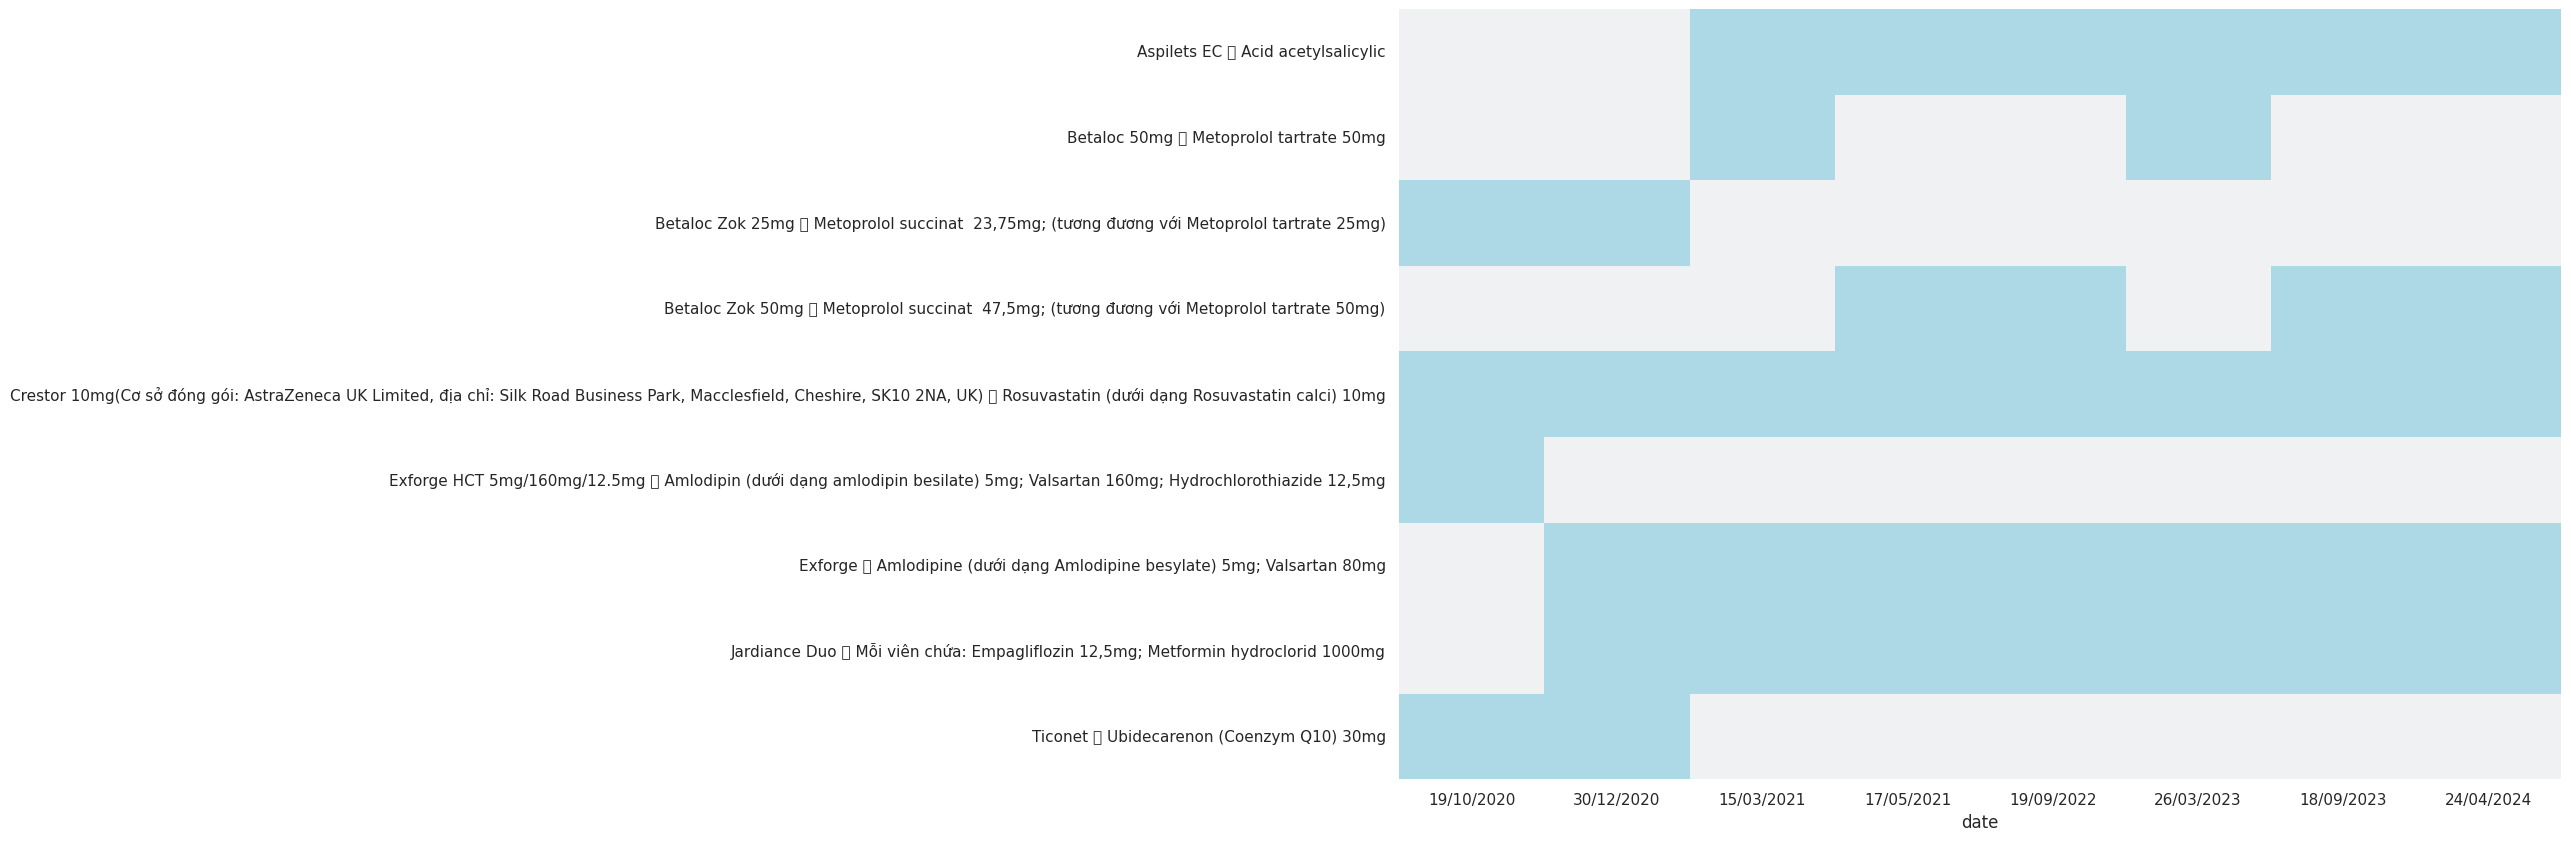

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df.T,cmap=sns.light_palette('lightblue'),cbar = False)
plt.savefig('/content/drive/MyDrive/NLP/drug_his.png')
plt.show()

In [ ]:
Generic_drugs.keys()

dict_keys(['Crestor 10mg(Cơ sở đóng gói: AstraZeneca UK Limited, địa chỉ: Silk Road Business Park, Macclesfield, Cheshire, SK10 2NA, UK) － Rosuvastatin (dưới dạng Rosuvastatin calci) 10mg', 'Exforge HCT 5mg/160mg/12.5mg － Amlodipin (dưới dạng amlodipin besilate) 5mg; Valsartan 160mg; Hydrochlorothiazide 12,5mg', 'Betaloc Zok 25mg － Metoprolol succinat  23,75mg; (tương đương với Metoprolol tartrate 25mg)', 'Ticonet － Ubidecarenon (Coenzym Q10) 30mg', 'Jardiance Duo － Mỗi viên chứa: Empagliflozin 12,5mg; Metformin hydroclorid 1000mg', 'Exforge － Amlodipine (dưới dạng Amlodipine besylate) 5mg; Valsartan 80mg', 'Betaloc 50mg － Metoprolol tartrate 50mg', 'Aspilets EC － Acid acetylsalicylic', 'Betaloc Zok 50mg － Metoprolol succinat  47,5mg; (tương đương với Metoprolol tartrate 50mg)'])